In [21]:
import pandas as pd
import numpy as np
import re
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot as plt
df = pd.read_excel('GooglePlaystore.xlsx', 'googleplaystore')
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


#### Preprocessing ####
#### Part1: Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record. ####

In [22]:
###Preprocessing
#part1
df_filtered = df[df['Reviews'].str.contains(r'^\d+.*[M|m]+$', na=False)].index 
df.drop(df_filtered, inplace = True)
df

                 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


#### Part 2: Remove rows where any of the columns has the value "Varies with device". ####

In [23]:
#part2
for row in df:
    df_filtered = df[df[row].apply(str).str.contains('Varies with device', na=False)].index
    df.drop(df_filtered, inplace = True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up


#### Part3: ####
#### The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6". If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0". ####



In [24]:
#Part3
for row in df['Android Ver']:
    m = re.search('^\d+[.]*\d*', str(row))
    if m != None:
        found = m.group()
        df['Android Ver'] = df['Android Ver'].replace([row, 'Android Ver'], float(found))
    else:
        df['Android Ver'] = df['Android Ver']
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


#### Part4: The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits. ####


In [25]:
#Part4
df['Installs'] = df['Installs'].replace(',', '', regex = True)
df['Installs'] = df['Installs'].str.replace('+', '')
for row in df.loc[: ,'Installs']:
    if '.' in row:
        df.drop(row, inplace = True)
    else:
        continue
df = df.astype({'Installs': int}, errors='raise') 
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


#### Part5: For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row. ####

In [36]:
#part5
for index, row in df.iterrows():
    if ((str(row['Rating']) == 'NaN') | (str(row['Rating']) == 'nan')):
        if ((float(row['Reviews']) < 100) & (float(row['Installs']) < 50000)):
            df.drop(index, inplace = True)
        else:
            mean = df.groupby('Category')['Rating'].mean().get(key = row['Category'])
            df.loc[index ,'Rating'] = round(mean,2)
df.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.80,178,19000000,50000,Free,0,Everyone,Art & Design,2018-04-26 00:00:00,1.1,4.0
7,Infinite Painter,ART_AND_DESIGN,4.10,36815,29000000,1000000,Free,0,Everyone,Art & Design,2018-06-14 00:00:00,6.1.61.1,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.40,13791,33000000,1000000,Free,0,Everyone,Art & Design,2017-09-20 00:00:00,2.9.2,3.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.70,121,3100000,10000,Free,0,Everyone,Art & Design;Creativity,2018-07-03 00:00:00,2.8,4.0
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.40,13880,28000000,1000000,Free,0,Everyone,Art & Design,2017-10-27 00:00:00,1.0.4,4.1


#### Part6: Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400. ####

In [27]:
#Part6:
df['Size'] = df['Size'].replace({r"[k|K]":"*1e3", r"[M|m]":"*1e6"}, regex=True).map(pd.eval).astype(int)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582000,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


#### Analysis: ####
#### For the following tasks, do preprocessing or changing of data types in the data frame as required. ####
#### Part1: Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.####

In [28]:
#Analysis:
#part1
df3 = df.groupby('Category')['Rating'].describe()
df3

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


#### Part2: Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
#### Rating (gives top 3 most highly rated applications in each category) ####
#### Installs (gives top 3 most installed applications in each category) ####
#### Reviews (gives top 3 most reviewed applications in each category) ####
#### You don't need to do anything explicit to break ties. ####

#### Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance: ####

In [29]:
#part2
free_apps = df[df['Type'] == 'Free']
def Function(arg):
    List = []
    categories = list(free_apps.groupby('Category').count().index)
    for c in categories:
        Appsbycategory = free_apps[free_apps['Category'] == c]
        t = Appsbycategory[['Category', 'App', arg]]
        Sorted = t.sort_values([arg], ascending=False)
        x = Sorted[:3].values
        List = List + [[x[0][0], x[0][1], x[0][2]]]
        List = List + [[x[1][0], x[1][1], x[1][2]]]
        List = List + [[x[2][0], x[2][1], x[2][2]]]
    return pd.DataFrame(List, columns = ['Category', 'App', arg])


In [30]:
Function('Rating')

,Category,App,Rating
0,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
1,ART_AND_DESIGN,Fantasy theme dark bw black building,4.8
2,ART_AND_DESIGN,Cardi B Wallpaper,4.8
3,AUTO_AND_VEHICLES,DMV Permit Practice Test 2018 Edition,4.9
4,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,4.9
...,...,...,...
94,VIDEO_PLAYERS,Video Downloader - for Instagram Repost App,4.8
95,VIDEO_PLAYERS,AJ Player,4.8
96,WEATHER,Weather forecast,4.8
97,WEATHER,Live Weather Pro,4.8


In [31]:
Function('Installs')

,Category,App,Installs
0,ART_AND_DESIGN,ibis Paint X,10000000
1,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
2,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
3,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000
4,AUTO_AND_VEHICLES,Fines of the State Traffic Safety Inspectorate...,5000000
...,...,...,...
94,VIDEO_PLAYERS,Dubsmash,100000000
95,VIDEO_PLAYERS,LIKE – Magic Video Maker & Community,50000000
96,WEATHER,Weather & Clock Widget for Android,50000000
97,WEATHER,Amber Weather,10000000


In [32]:
Function('Reviews')

,Category,App,Reviews
0,ART_AND_DESIGN,ibis Paint X,224399
1,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216
2,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531
3,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136
4,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648
...,...,...,...
94,VIDEO_PLAYERS,"DU Recorder – Screen Recorder, Video Editor, Live",2588730
95,VIDEO_PLAYERS,Dubsmash,1971777
96,WEATHER,Weather & Clock Widget for Android,2371543
97,WEATHER,Amber Weather,260137


#### Part3: Find the average, maximum and minimum price of the paid applications. ####

In [33]:
#part3
Paid_apps = df[df['Type'] == 'Paid']
Mean = Paid_apps['Price'].mean()
Max = Paid_apps['Price'].max()
Min = Paid_apps['Price'].min()
print("Mean = ", Mean, "Max = ", Max, "Min = ", Min)

Mean =  15.139163763066062 Max =  400 Min =  0.99


#### Visualisation: ####
#### Part1: In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’]. Count the number of applications per genre and display it using a pie chart.Hint: Read about DataFrame.explode() ####

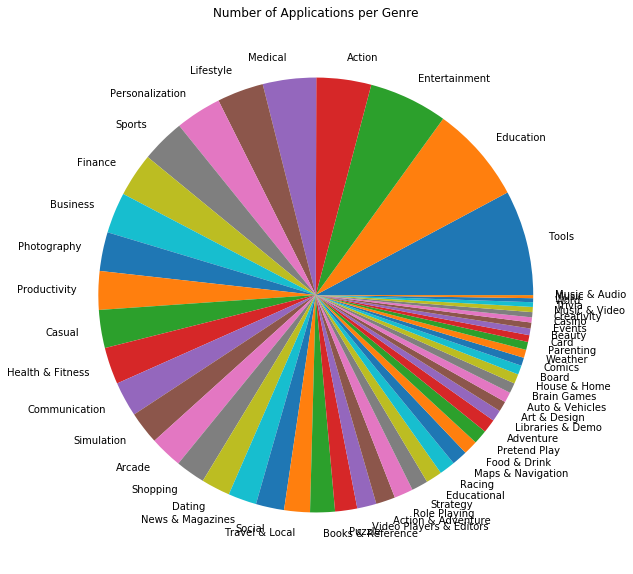

In [37]:
#Visualization
#Part1:
GenApp = pd.DataFrame()
GenApp['App'] = df['App']
GenApp['Genres'] = pd.Series(df['Genres'].str.split(';'))
GenApp = GenApp.explode('Genres')
AperG = GenApp['Genres'].value_counts()

plt.figure(figsize=(10,10))
plt.tight_layout(pad=4.0)
plt.pie(AperG, labels=AperG.index)
plt.title("Number of Applications per Genre")
plt.show()

#### Part2: Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot. ####

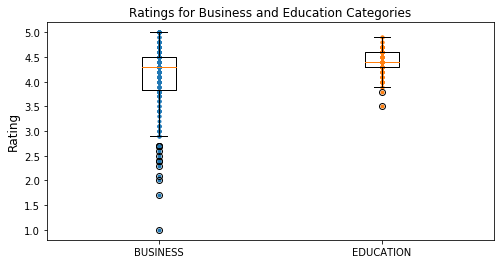

In [35]:
List = df[['Category','Rating']].groupby('Category')['Rating'].apply(list)
df_Business = List['BUSINESS']
df_Education = List['EDUCATION']


plt.figure(figsize=(8, 4))
plt.plot([1]*246, df_Business, '.')
plt.plot([2]*110, df_Education, '.')
plt.boxplot([df_Business, df_Education],labels=('BUSINESS','EDUCATION'))
plt.ylabel('Rating', fontsize=12)
plt.title("Ratings for Business and Education Categories")
plt.show()

        
        
    